<a href="https://colab.research.google.com/github/suumino/R/blob/main/rclass14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 치킨집이 가장 많은 지역을 찾아보자
# 그림의 크기로 많은 지역을 표*현 뀨뀨뀨뀨뀨뀨뀨
# 치킨집 데이터 구하기
# www.localdata.kr

In [3]:
#한글이 깨지는 현상을 방지하기 위해서 showtext 라는 패키지를 이용하여 한글 글꼴을 추가한다.
install.packages('showtext', repos='http://cran.rstudio.com/')

#패키지를 올리고(?)
library(showtext)

#바로 이렇게 구글폰트를 다운 받습니다.
# 다운 받을 폰트 이름 : Noto Sans KR, 내가 사용할 이름 : notosanskr
font_add_google('Noto Sans KR', 'notosanskr')

#showtext 글꼴을 자동으로 사용하겠다.
showtext_auto()
font_add_google('Noto Sans KR', 'notosanskr')


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: sysfonts

Loading required package: showtextdb



In [4]:
library(readxl)

In [22]:
# 변수에 자료 저장 변수에 자료 저장
ck <- read_excel('치킨집_가공.xlsx')

In [23]:
head(ck)

소재지전체주소,사업장명
<chr>,<chr>
서울특별시 서대문구 창천동 52-20번지 2층,쪼리375
서울특별시 서대문구 창천동 53-83번지 (지상1층),고향
서울특별시 서대문구 창천동 53-3번지 2층,"찬수씨, 싼술을부탁해"
서울특별시 서대문구 남가좌동 377번지 삼성아파트 상가동 101호,케리홈치킨
서울특별시 서대문구 연희동 134-28번지 지하1층,연희38애비뉴
서울특별시 서대문구 창천동 62-53번지 1층 일부,닭꼬치야


In [24]:
# 동별로 추출하여 상세 주소는 제거 substr()를 사용하여 동까지만 남기고 나머지 삭제

addr <- substr(ck$'소재지전체주소', 11, 16)  # substr(데이터 시작 끝) : 데이터 잘라냄

In [25]:
head(addr)

[1] " 창천동 5"  " 창천동 5"  " 창천동 5"  " 남가좌동 " " 연희동 1" 
[6] " 창천동 6"

In [26]:
# gsub(): 숫자들과 공백 모두 삭제

addr_num <- gsub('[0-9]', '', addr) # gsub(찾을값, 바꿀밧, 어디에)
head(addr_num)
addr_trim <- gsub(' ', '', addr_num)
head(addr_trim)

[1] " 창천동 "   " 창천동 "   " 창천동 "   " 남가좌동 " " 연희동 "  
[6] " 창천동 "

[1] "창천동"   "창천동"   "창천동"   "남가좌동" "연희동"   "창천동"

In [27]:
# table(): 동별 업소 개수 확인

library(dplyr)
addr_count <- addr_trim %>% table() %>% data.frame()
head(addr_count)

,.,Freq
,<fct>,<int>
1,남가좌동,282
2,냉천동,24
3,대신동,3
4,대현동,69
5,미근동,6
6,북가좌동,155


In [28]:
install.packages('treemap')
library(treemap)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



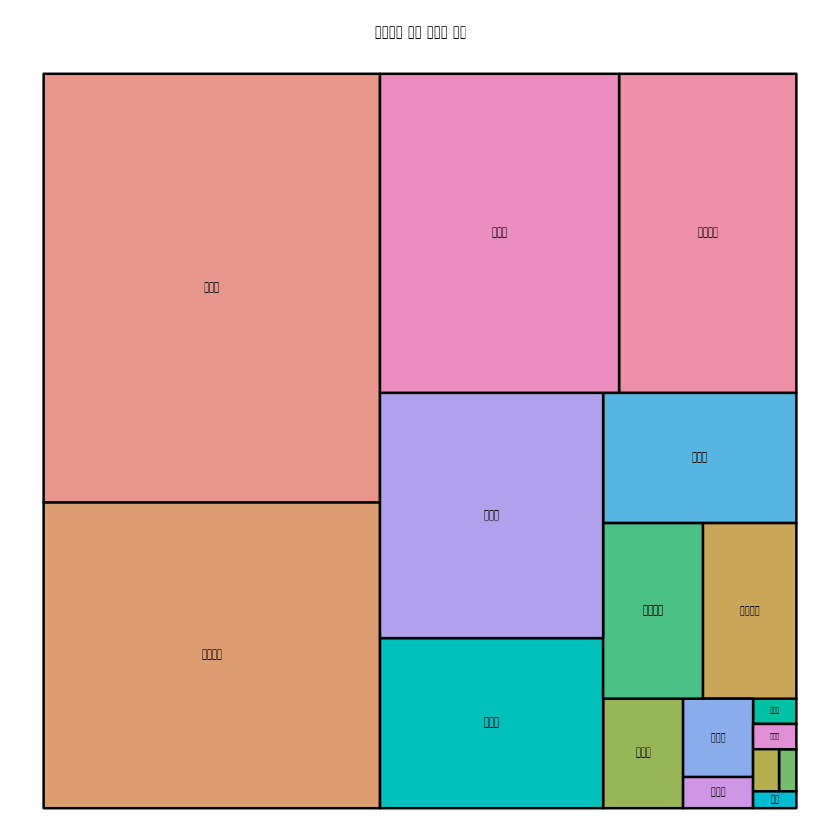

In [29]:
treemap(addr_count, index = '.',  vSize='Freq', title = '서대문구 동별 치킨집 분포')